<a href="https://colab.research.google.com/github/swatimaurya19/python_ml-project/blob/main/Jagriti_Verma%2C_Swati_Maurya_Employee_Attrition_Analysis__Major_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Neccesary Libraries

In [ ]:
# Data analysis tools
import pandas as pd
import numpy as np

In [ ]:
# Data Pre-Processing Libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
# Data Visualization Tools
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# For Train-Test Split
from sklearn.model_selection import train_test_split

In [ ]:
# Libraries for various Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import  GradientBoostingClassifier

In [ ]:
# Metrics Tools
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score


In [ ]:
#For Receiver Operating Characteristic (ROC)
from sklearn.metrics import roc_curve ,roc_auc_score, auc


Getting Data Ready

In [ ]:
#Loading the Data Set
EA = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
EA.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
#dropping unneccesary columns
EA = EA.drop(['DailyRate', 'EducationField','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate','Over18','StandardHours','TotalWorkingYears','YearsWithCurrManager','YearsInCurrentRole','Department','JobRole','Education','PercentSalaryHike'], axis=1)
EA.head(5)

,Age,Attrition,BusinessTravel,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,1,2,Female,3,2,4,Single,5993,8,Yes,3,1,0,0,1,6,0
1,49,No,Travel_Frequently,8,3,Male,2,2,2,Married,5130,1,No,4,4,1,3,3,10,1
2,37,Yes,Travel_Rarely,2,4,Male,2,1,3,Single,2090,6,Yes,3,2,0,3,3,0,0
3,33,No,Travel_Frequently,3,4,Female,3,1,3,Married,2909,1,Yes,3,3,0,3,3,8,3
4,27,No,Travel_Rarely,2,1,Male,3,1,2,Married,3468,9,No,3,4,1,3,3,2,2


In [ ]:
EA.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion'],
      dtype='object')

In [ ]:
#Understanding the Structure of the Dataset
EA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DistanceFromHome          1470 non-null   int64 
 4   EnvironmentSatisfaction   1470 non-null   int64 
 5   Gender                    1470 non-null   object
 6   JobInvolvement            1470 non-null   int64 
 7   JobLevel                  1470 non-null   int64 
 8   JobSatisfaction           1470 non-null   int64 
 9   MaritalStatus             1470 non-null   object
 10  MonthlyIncome             1470 non-null   int64 
 11  NumCompaniesWorked        1470 non-null   int64 
 12  OverTime                  1470 non-null   object
 13  PerformanceRating         1470 non-null   int64 
 14  RelationshipSatisfaction

In [ ]:
#There is no NaN values in the dataset
print(pd.isnull(EA).sum())

Age                         0
Attrition                   0
BusinessTravel              0
DistanceFromHome            0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsSinceLastPromotion     0
dtype: int64


In [ ]:
#mapping non-numeric values to numeric values
EA_Nu = EA.copy()
YN_mapping = {"Yes": 1, "No": 0}
EA_Nu['Attrition'] = EA_Nu['Attrition'].map(YN_mapping)
EA_Nu['OverTime'] = EA_Nu['OverTime'].map(YN_mapping)
BusinessTravel_mapping = {"Travel_Rarely": 0, "Travel_Frequently": 1, "Non-Travel": 0}
EA_Nu['BusinessTravel'] = EA_Nu['BusinessTravel'].map(BusinessTravel_mapping)
Gender_mapping = {"Female": 1, "Male": 0}
EA_Nu['Gender'] = EA_Nu['Gender'].map(Gender_mapping)
Marital_mapping = {"Married": 1, "Single": 0, "Divorced": 0}
EA_Nu['MaritalStatus'] = EA_Nu['MaritalStatus'].map(Marital_mapping)

EA_Nu.head(5)

,Age,Attrition,BusinessTravel,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1,0,1,2,1,3,2,4,0,5993,8,1,3,1,0,0,1,6,0
1,49,0,1,8,3,0,2,2,2,1,5130,1,0,4,4,1,3,3,10,1
2,37,1,0,2,4,0,2,1,3,0,2090,6,1,3,2,0,3,3,0,0
3,33,0,1,3,4,1,3,1,3,1,2909,1,1,3,3,0,3,3,8,3
4,27,0,0,2,1,0,3,1,2,1,3468,9,0,3,4,1,3,3,2,2


In [ ]:
#Treating Missing Values
EA.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DistanceFromHome            0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsSinceLastPromotion     0
dtype: int64

Observation: No Missing Values in the dataset. Hence no treatment for missing values required

In [ ]:
#Finding and removing all the duplicated values
len(EA[EA.duplicated()])

0

Observation: The dataset does not have any duplicate values.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Checking imbalance')

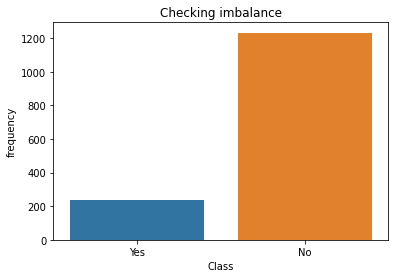

In [ ]:
#The dataset does not have any duplicate values
sns.countplot(EA["Attrition"])
plt.xlabel("Class")
plt.ylabel("frequency")
plt.title("Checking imbalance")

Observation: From the graph, it is clear that the class distribution is Imbalanced. The dataset has 80% samples of class 0 (employee is not leaving the job) and 20% samples of class 1(employee has decided to leave the job).

**A) EXPLORATORY DATA ANALYSIS**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


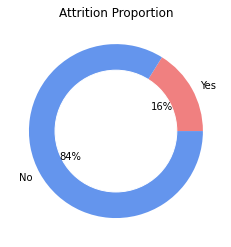

In [ ]:
#Attrition Proportion
Y_count = len(EA[EA['Attrition'] == 'Yes'])
N_count = len(EA[EA['Attrition'] == 'No'])
# create data
names='Yes', 'No',
size=[Y_count,N_count]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['lightcoral','cornflowerblue'],autopct='%1.0f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
ax = plt.axes()
ax.set_title("Attrition Proportion")
plt.show()

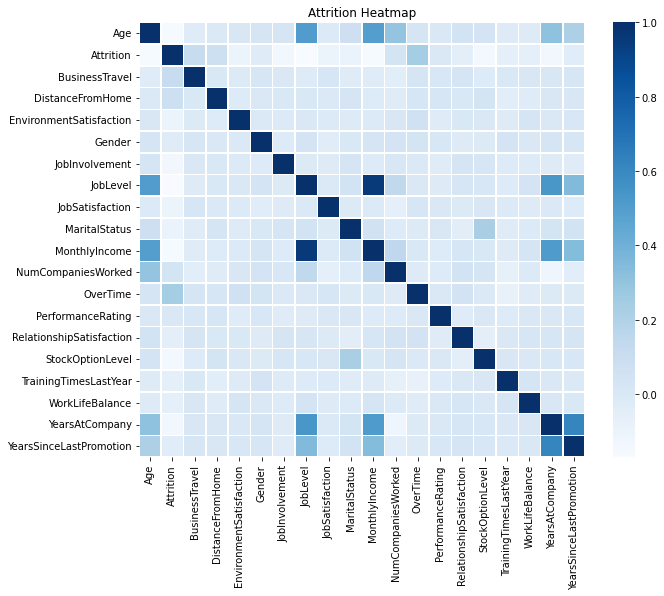

In [ ]:
#Heatmap
plt.subplots(figsize=(10,8))
ax = plt.axes()
ax.set_title("Attrition Heatmap")
corr = EA_Nu.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="Blues",linewidths=.5)

Analysis Based on Objective Factor

In [ ]:
Age_YAC_NCW = EA[['Age','YearsAtCompany','NumCompaniesWorked','Attrition']]
#Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
#AYN_melt.head()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplo

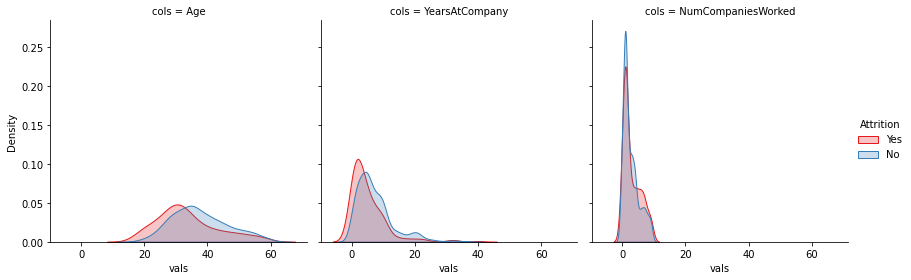

In [ ]:
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())

Observation:

1.Focus on the red area--distribution of Attrition

2.Lots of attrition among the 'young' employees (for Age or for YearsAtCompany)-- not surprising -- trial to find a suit -- company culture..

3.Those who have worked in more than 5 companies tend to attrit. -- The average time spent in every company is shorter -- HR insight..

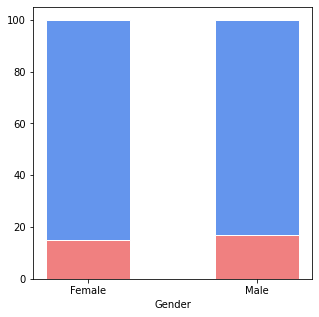

In [ ]:
# Data
r = [0,1]
Y_F = len(EA[(EA['Attrition'] == 'Yes') & (EA['Gender'] == 'Female')])
N_F = len(EA[(EA['Attrition'] == 'No') & (EA['Gender'] == 'Female')])
Y_M = len(EA[(EA['Attrition'] == 'Yes') & (EA['Gender'] == 'Male')])
N_M = len(EA[(EA['Attrition'] == 'No') & (EA['Gender'] == 'Male')])
raw_data = {'greenBars': [Y_F, Y_M], 'orangeBars': [N_F, N_M]}
df = pd.DataFrame(raw_data)

# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]

# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('Female','Male')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(r, names)
plt.xlabel("Gender")

# Show graphic
plt.show()

Analysis Based on Bonus And Return

In [ ]:
Income = EA[['MonthlyIncome','Attrition']]
Income_melt = Income.melt(['Attrition'], var_name='cols',  value_name='vals')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


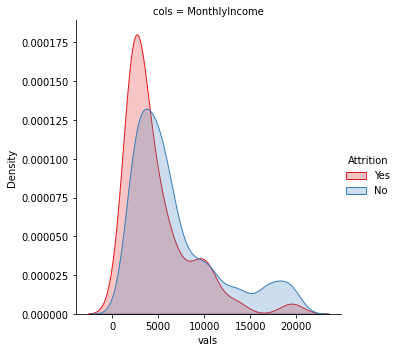

In [ ]:
g = sns.FacetGrid(Income_melt, col='cols', hue="Attrition", palette="Set1",size=5)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())

Observation:
Employees with low income tend to attrit

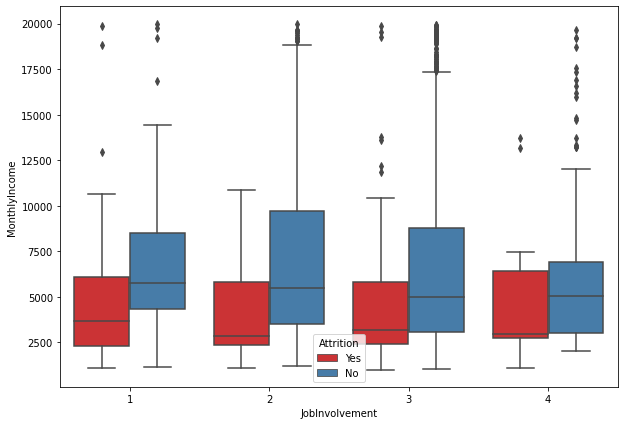

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x="JobInvolvement", y="MonthlyIncome", hue="Attrition",
            data=EA, palette="Set1")

Observations:
Low income together with similar involvement is the reason behind attrition

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplo

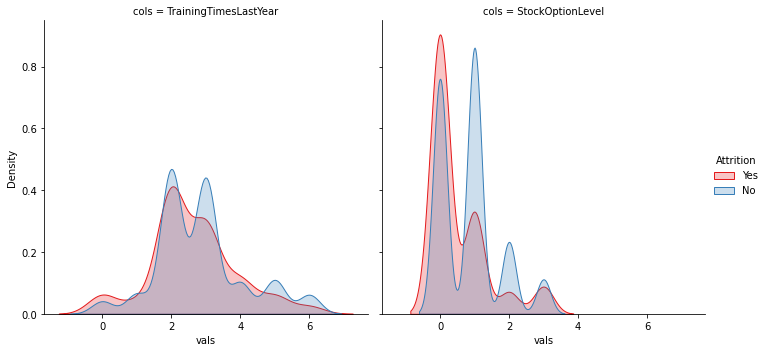

In [ ]:
TS = EA[['TrainingTimesLastYear','StockOptionLevel','Attrition']]
#Age_YAC_NCW.head()
TS_melt = TS.melt(['Attrition'], var_name='cols',  value_name='vals')
#AYN_melt.head()
g = sns.FacetGrid(TS_melt, col='cols', hue="Attrition", palette="Set1",size=5)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())

Observations: Employee pay attention to stock option -- when given option, work for the company may increase return.

Analysis Based on Satisfaction

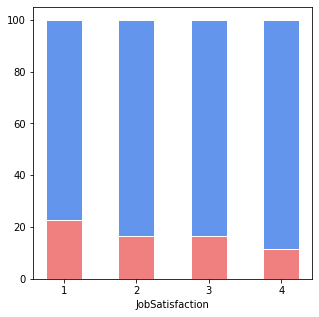

In [ ]:
#JOB SATISFACTION
# Data
r = [0,1,2,3]
Y_J1 = len(EA[(EA['Attrition'] == 'Yes') & (EA['JobSatisfaction'] == 1)])
N_J1 = len(EA[(EA['Attrition'] == 'No') & (EA['JobSatisfaction'] == 1)])
Y_J2 = len(EA[(EA['Attrition'] == 'Yes') & (EA['JobSatisfaction'] == 2)])
N_J2 = len(EA[(EA['Attrition'] == 'No') & (EA['JobSatisfaction'] == 2)])
Y_J3 = len(EA[(EA['Attrition'] == 'Yes') & (EA['JobSatisfaction'] == 3)])
N_J3 = len(EA[(EA['Attrition'] == 'No') & (EA['JobSatisfaction'] == 3)])
Y_J4 = len(EA[(EA['Attrition'] == 'Yes') & (EA['JobSatisfaction'] == 4)])
N_J4 = len(EA[(EA['Attrition'] == 'No') & (EA['JobSatisfaction'] == 4)])
raw_data = {'greenBars': [Y_J1, Y_J2,Y_J3,Y_J4], 'orangeBars': [N_J1,N_J2,N_J3,N_J4]}
df = pd.DataFrame(raw_data)

# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]

# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('1','2','3','4')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(r, names)
plt.xlabel("JobSatisfaction")

# Show graphic
plt.show()

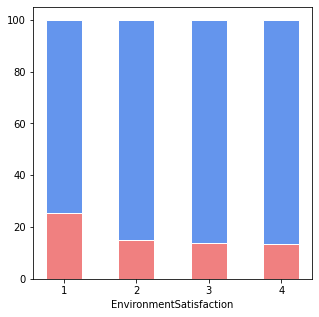

In [ ]:
#ENVIRONMENT SATISFACTION
# Data
r = [0,1,2,3]
Y_J1 = len(EA[(EA['Attrition'] == 'Yes') & (EA['EnvironmentSatisfaction'] == 1)])
N_J1 = len(EA[(EA['Attrition'] == 'No') & (EA['EnvironmentSatisfaction'] == 1)])
Y_J2 = len(EA[(EA['Attrition'] == 'Yes') & (EA['EnvironmentSatisfaction'] == 2)])
N_J2 = len(EA[(EA['Attrition'] == 'No') & (EA['EnvironmentSatisfaction'] == 2)])
Y_J3 = len(EA[(EA['Attrition'] == 'Yes') & (EA['EnvironmentSatisfaction'] == 3)])
N_J3 = len(EA[(EA['Attrition'] == 'No') & (EA['EnvironmentSatisfaction'] == 3)])
Y_J4 = len(EA[(EA['Attrition'] == 'Yes') & (EA['EnvironmentSatisfaction'] == 4)])
N_J4 = len(EA[(EA['Attrition'] == 'No') & (EA['EnvironmentSatisfaction'] == 4)])
raw_data = {'greenBars': [Y_J1, Y_J2,Y_J3,Y_J4], 'orangeBars': [N_J1,N_J2,N_J3,N_J4]}
df = pd.DataFrame(raw_data)

# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]

# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('1','2','3','4')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(r, names)
plt.xlabel("EnvironmentSatisfaction")

# Show graphic
plt.show()

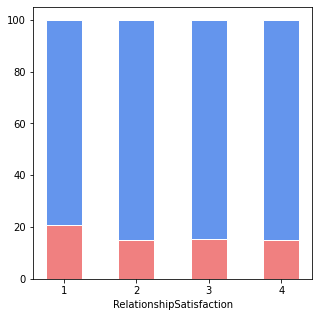

In [ ]:
#RELATIONSHIP SATISFACTION
# Data
r = [0,1,2,3]
Y_J1 = len(EA[(EA['Attrition'] == 'Yes') & (EA['RelationshipSatisfaction'] == 1)])
N_J1 = len(EA[(EA['Attrition'] == 'No') & (EA['RelationshipSatisfaction'] == 1)])
Y_J2 = len(EA[(EA['Attrition'] == 'Yes') & (EA['RelationshipSatisfaction'] == 2)])
N_J2 = len(EA[(EA['Attrition'] == 'No') & (EA['RelationshipSatisfaction'] == 2)])
Y_J3 = len(EA[(EA['Attrition'] == 'Yes') & (EA['RelationshipSatisfaction'] == 3)])
N_J3 = len(EA[(EA['Attrition'] == 'No') & (EA['RelationshipSatisfaction'] == 3)])
Y_J4 = len(EA[(EA['Attrition'] == 'Yes') & (EA['RelationshipSatisfaction'] == 4)])
N_J4 = len(EA[(EA['Attrition'] == 'No') & (EA['RelationshipSatisfaction'] == 4)])
raw_data = {'greenBars': [Y_J1, Y_J2,Y_J3,Y_J4], 'orangeBars': [N_J1,N_J2,N_J3,N_J4]}
df = pd.DataFrame(raw_data)

# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]

# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('1','2','3','4')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(r, names)
plt.xlabel("RelationshipSatisfaction")

# Show graphic
plt.show()

**B) PREDICTION OF ATTRITION**

Defining the Tatget and Predictor Variables and Standard Scaling

In [ ]:
X=EA.drop('Attrition',axis=1)

In [ ]:
em = pd.get_dummies(X)

In [ ]:
em.head()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,...,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,2,3,2,4,5993,8,3,1,...,0,0,1,1,0,0,0,1,0,1
1,49,8,3,2,2,2,5130,1,4,4,...,0,1,0,0,1,0,1,0,1,0
2,37,2,4,2,1,3,2090,6,3,2,...,0,0,1,0,1,0,0,1,0,1
3,33,3,4,3,1,3,2909,1,3,3,...,0,1,0,1,0,0,1,0,0,1
4,27,2,1,3,1,2,3468,9,3,4,...,0,0,1,0,1,0,1,0,1,0


In [ ]:
EA['Attrition']=LabelEncoder().fit_transform(EA['Attrition'])
y=EA['Attrition']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(em,y, test_size=0.30, random_state=0)


Model 1) Logistic Regression

In [ ]:
#Fitting the model

logistic_Regression = LogisticRegression(max_iter=3000,random_state=0,class_weight="balanced",solver = "saga")
logistic_Regression.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(class_weight='balanced', max_iter=3000, random_state=0,
                   solver='saga')

In [ ]:
# Applying the model to the x_test

y_pred = logistic_Regression.predict(x_test)


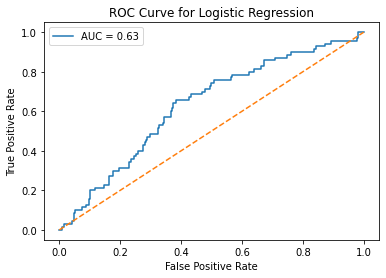

In [ ]:
# Plotting the ROC Curve

prob_lr=logistic_Regression.predict_proba(x_test)
auc_lr = roc_auc_score(y_test,prob_lr[:,1])
fprlr,tprlr,_ = roc_curve(y_test,prob_lr[:,1])
roc_auc=auc(fprlr,tprlr)
plt.plot(fprlr,tprlr,label = "AUC = %.2f" % auc_lr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

Model 2) KNN

In [ ]:
#Fitting the model

knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=35)

In [ ]:
# Applying the model to the x_test

pred_knn = knn.predict(x_test)

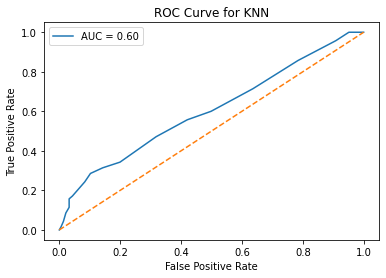

In [ ]:
# Plotting the ROC Curve
prob_knn= knn.predict_proba(x_test)
auc_knn = roc_auc_score(y_test,prob_knn[:,1])
fprknn,tprknn,_= roc_curve(y_test,prob_knn[:,1])
roc_auc_knn=auc(fprknn,tprknn)
plt.plot(fprknn,tprknn,label = "AUC = %.2f" % auc_knn)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

Model 3) Gradient Boosting

In [ ]:
#Fitting the model

GBC=GradientBoostingClassifier(n_estimators=150)
GBC.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=150)

In [ ]:
# Applying the model to the x_test

Y_predict=GBC.predict(x_test)

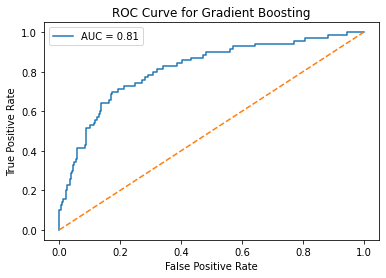

In [ ]:
# Plotting the ROC Curve

prob_GBC= GBC.predict_proba(x_test)
auc_GBC = roc_auc_score(y_test,prob_GBC[:,1])
fprGBC,tprGBC,_= roc_curve(y_test,prob_GBC[:,1])
roc_auc_GBC=auc(fprGBC,tprGBC)
plt.plot(fprGBC,tprGBC,label = "AUC = %.2f" % auc_GBC)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Gradient Boosting")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

**C) CONFUSION MATRIX OF USED MODALS**

Model 1) Logistic Regression

[[232  25]
 [139  45]]


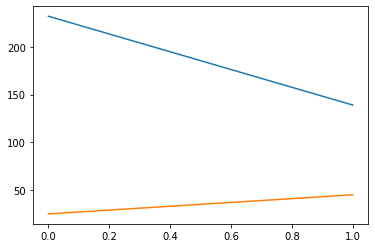

In [ ]:
# Confusion Matrix

cmlr=confusion_matrix(y_pred,y_test)
print(cmlr)
plt.plot(cmlr)
plt.show()

Model 2) KNN

[[371  70]
 [  0   0]]


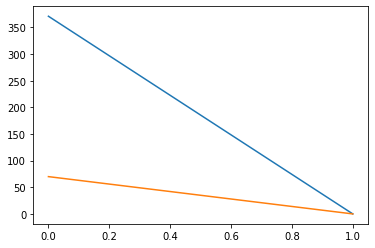

In [ ]:
# Confusion Matrix

cm_knn=confusion_matrix(pred_knn,y_test)
print(cm_knn)
plt.plot(cm_knn)
plt.show()

Model 3) Gradient Boosting

[[352  19]
 [ 46  24]]


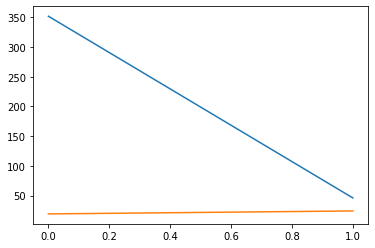

In [ ]:
# Confusion Matrix

cm_gbc=confusion_matrix(y_test,Y_predict)
print(cm_gbc)
plt.plot(cm_gbc)
plt.show()

**D) STUDYING THE ACCURACY AND F-1 SCORE OF THE MODEL**

ACCURACY

Model 1) Logistic Regression

In [ ]:
# Finding Accuracy

log = accuracy_score(y_pred,y_test)*100

Model 2) KNN

In [ ]:
# Finding Accuracy

KNN = accuracy_score(pred_knn,y_test)*100

Model 3) Gradient Boosting

In [ ]:
# Finding Accuracy

gbc = accuracy_score(y_test,Y_predict)*100

In [ ]:
# Accuracy values for all the models
print("1)  Logistic Regression    :",round(log, 2))
print("2)  KNN                    :",round(KNN, 2))
print("6)  Gradient Boosting      :",round(gbc, 2))

1)  Logistic Regression    : 62.81
2)  KNN                    : 84.13
6)  Gradient Boosting      : 85.26


Observations:

Here, Gradient Boosting has the highest accuracy rate. But during Data visualization step, we observed that the class distribution is Imbalanced. The dataset has 80% samples of class 0 (the employee is not leaving their job) and 20% samples of class 1(The employee has decided to leave their job). This is the reason why most of the models are getting accuracy above 90% by simply predicting every training sample belonging to class 0. But, when we apply this model to a new test-set, then the test accuracy would drop to less than 60%.

In this case, Accuracy metric proves to be a poor indicator of model performance. Therefore, we need to consider other metrics before deciding the best model.

 F-1 SCORE

Model 1) Logistic Regression

In [ ]:
# Classification Report that computes various
# metrics like Precision, Recall and F1 Score

print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.63      0.90      0.74       257
           1       0.64      0.24      0.35       184

    accuracy                           0.63       441
   macro avg       0.63      0.57      0.55       441
weighted avg       0.63      0.63      0.58       441



Model 2) KNN

In [ ]:
# Classification Report that computes various
# metrics like Precision, Recall and F1 Score

print(classification_report(pred_knn,y_test))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       441
           1       0.00      0.00      0.00         0

    accuracy                           0.84       441
   macro avg       0.50      0.42      0.46       441
weighted avg       1.00      0.84      0.91       441



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model 3) Gradient Boosting

In [ ]:
# Classification Report that computes various
# metrics like Precision, Recall and F1 Score

print(classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       371
           1       0.56      0.34      0.42        70

    accuracy                           0.85       441
   macro avg       0.72      0.65      0.67       441
weighted avg       0.83      0.85      0.84       441



In [ ]:
# f1_score of all models
print("1)  Logistic Regression    :",round(f1_score(y_pred,y_test), 2))
print("2)  KNN                    :",round(f1_score(pred_knn,y_test), 2))
print("6)  Gradient Boosting      :",round(f1_score(Y_predict,y_test), 2))

1)  Logistic Regression    : 0.35
2)  KNN                    : 0.0
6)  Gradient Boosting      : 0.42


Observation:

F1 Score - F1 Score is the Harmonic Mean between precision and recall.

F1 Score tells how precise the classifier is (how many values it classifies correctly).

The greater the F1 Score, the better is the performance of our model.

Gradient Boosting has the highest F1 score.Hence, Gradient Boosting is the best fit model



**E) REASON BEHIND CHOOSNG THE MODEL**

Gradient  boosting  (GB)  builds  new  models  sequentially  from  a  set  of  weak  models  by minimising loss functions for each new model. The descent of gradients determines the loss function. Every new model that uses  the  loss function better matches the observations and improves  overall accuracy.  Boosting,  on the  other  hand, must  be  stopped at  some  point; otherwise, the model looks to be overfishing. The stop criterion could be a certain level of accuracy or a certain number of models. The  GBDT  [20]  community  model  of  sequence-trained  decision-making  trees  is  a community model of sequence-trained decision-making trees. Learning decision bodies is the most time-consuming component of learning a decision tree in GBDT, and identifying the appropriate split points is the most time-consuming aspect of learning a decision tree. The pre-sort algorithm, which lists all possible dividing points with pre-sorting function values, is one of the most used dividing dots. This method is simple and can find the best splits.

**F) ACCURACY OF THE DONE PREDICTION**

In [ ]:
#Question 5
import pandas as pd
EA=pd.read_csv('/content/archive.zip')
EducationField_dict = EA["EducationField"].value_counts()
print(EducationField_dict )

EducationField_dict_new = {
    'Marketing':     3,
    'Medical':       2,
    'Life Sciences': 1,
    'Other':   0,
}

print(EducationField_dict_new)

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
{'Marketing': 3, 'Medical': 2, 'Life Sciences': 1, 'Other': 0}


In [ ]:
def EducationField(x):
    if str(x) in EducationField_dict_new.keys():
        return EducationField_dict_new[str(x)]
    else:
        return EducationField_dict_new['Other']

data_l = EA["EducationField"].apply(EducationField)
EA['EducationField'] = data_l
EA.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
gen = pd.get_dummies(EA["Gender"])
gen.head()

,Female,Male
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1


In [ ]:
hr = pd.get_dummies(EA["Department"])
hr.head()

,Human Resources,Research & Development,Sales
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [ ]:
Marital_dict = EA["MaritalStatus"].value_counts()
def Mar(x):
    if str(x) in Marital_dict.keys() and Marital_dict[str(x)] > 100:
        return str(x)
    else:
        return 'Other'

data_l = EA["MaritalStatus"].apply(Mar)
EA['New Marital'] = data_l
EA.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,New Marital
0,41,Yes,Travel_Rarely,1102,Sales,1,2,1,1,1,...,80,0,8,0,1,6,4,0,5,Single
1,49,No,Travel_Frequently,279,Research & Development,8,1,1,1,2,...,80,1,10,3,3,10,7,1,7,Married
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,0,1,4,...,80,0,7,3,3,0,0,0,0,Single
3,33,No,Travel_Frequently,1392,Research & Development,3,4,1,1,5,...,80,0,8,3,3,8,7,3,0,Married
4,27,No,Travel_Rarely,591,Research & Development,2,1,2,1,7,...,80,1,6,3,3,2,2,2,2,Married


In [ ]:
Mr = pd.get_dummies(EA["New Marital"])
Mr.head()

,Divorced,Married,Single
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0


In [ ]:
def Job(x):
    if x == 'Yes':
        return int(1)
    else:
        return int(0)

data_l = EA["JobRole"].apply(Job)
EA['New Job Role Match'] = data_l
EA.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,New Marital,New Job Role Match
0,41,Yes,Travel_Rarely,1102,Sales,1,2,1,1,1,...,0,8,0,1,6,4,0,5,Single,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,1,1,2,...,1,10,3,3,10,7,1,7,Married,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,0,1,4,...,0,7,3,3,0,0,0,0,Single,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,1,1,5,...,0,8,3,3,8,7,3,0,Married,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,2,1,7,...,1,6,3,3,2,2,2,2,Married,0
